## Resumo aula 6 de Machine Learning 2 ##

Função que calcula o score de silhueta, e os valores para o método do cotovelo

for k in range(2,10):

    kmeans = KMeans(n_clusters = k)

    kmeans.fit(dt_cluster[X_cols])

    inercia = kmeans.inertia_

    labels = kmeans.labels_

    silhueta = silhouette_score(dt_cluster[X_cols], labels)

    lista_inercia.append(inercia)
    
    lista_silhueta.append(silhueta)

plt.plot(range(2,10), lista_inercia, marker = "o")

# Exercício

Aplique KMeans no Iris dataset e realize os plots dos resultados para k clusters, com k de 1 a 8.

- 1) Importe o dataset iris: 

``` 
from sklearn.datasets import load_iris
data = load_iris(as_frame = True)
X = data["data"]
y = data["target"] # <- mas lembre-se que esse é inutil
```
- 2) Lembre-se que é necessário aplicar algum Scaler nos dados para realizar clusterização;
- 3) Delimite o range de clusters para aplicar;
- 4) Avalie as métricas para cada cluster;
- 5) Escolha 2 variáveis e observe a coloração para valor de cluster;}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, v_measure_score



In [3]:
data = load_iris(as_frame=True)
data

x = data['data']
y = data['target']

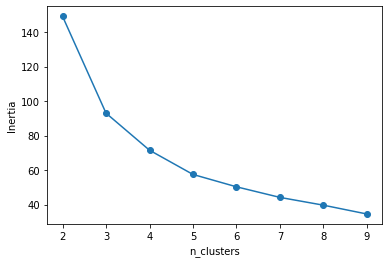

In [9]:
silhouette_list = []
inertia_list = []

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

for i in range(2, 10):

    pipe = Pipeline([('std_scaler', StandardScaler()),
                     ('kmeans', KMeans(n_clusters=i))])
    
    pipe.fit(x_train)
    inertia = pipe['kmeans'].inertia_
    labels = pipe['kmeans'].labels_
    silhouette = silhouette_score(x_train, labels= labels)

    silhouette_list.append(silhouette)
    inertia_list.append(inertia)
plt.ylabel('Inertia')
plt.xlabel('n_clusters')
plt.plot(range(2,10), inertia_list, marker = "o")


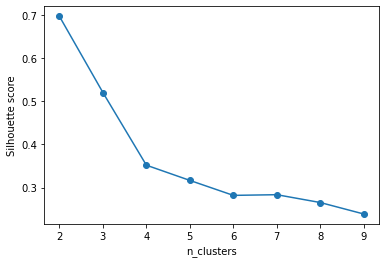

In [8]:
plt.ylabel('Silhouette score')
plt.xlabel('n_clusters')
plt.plot(range(2,10), silhouette_list, marker = "o")

In [6]:
pipe = Pipeline([('std_scaler', StandardScaler()),
                     ('kmeans', KMeans(n_clusters=3))])
    
pipe.fit(x_train)
x_train['cluster'] = pipe.predict(x_train)

C:\Users\vitor\AppData\Local\Temp/ipykernel_5612/2811764648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['cluster'] = pipe.predict(x_train)


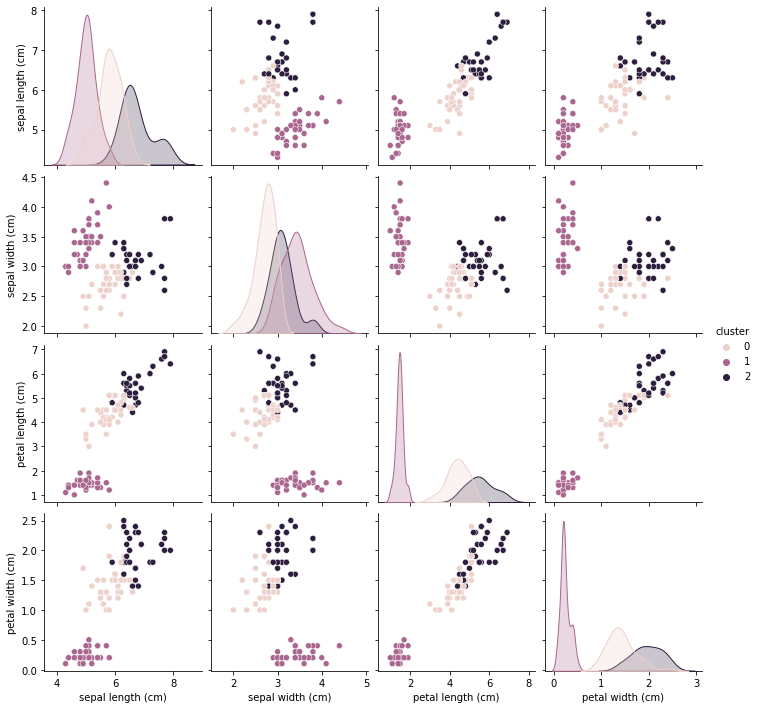

In [7]:
sns.pairplot(x_train, hue = 'cluster')